In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
matches=pd.read_csv("IPL Matches 2008-2020.csv")
delivers=pd.read_csv("IPL Ball-by-Ball 2008-2020 - IPL Ball-by-Ball 2008-2020.csv")

In [3]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [5]:
delivers.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: count, dtype: int64


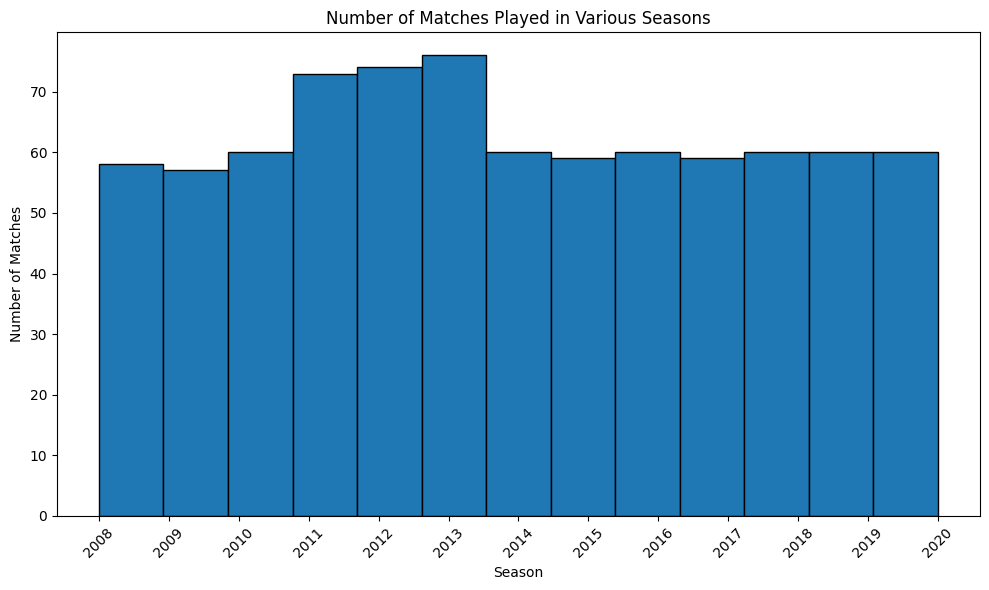

In [7]:
# Number of matches played in various seasons
matches['date']=pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year
matches_per_season = matches['season'].value_counts().sort_index()
print(matches_per_season)


plt.figure(figsize=(10, 6))
plt.hist(matches['season'], bins=matches_per_season.index.nunique(), edgecolor='black')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played in Various Seasons')
plt.xticks(matches_per_season.index, rotation=45)
plt.tight_layout()
plt.show()


    Season  Total Runs
0     2008       17937
1     2009       16320
2     2010       18864
3     2011       21154
4     2012       22453
5     2013       22541
6     2014       18909
7     2015       18332
8     2016       18862
9     2017       18769
10    2018       19901
11    2019       19400
12    2020       19352


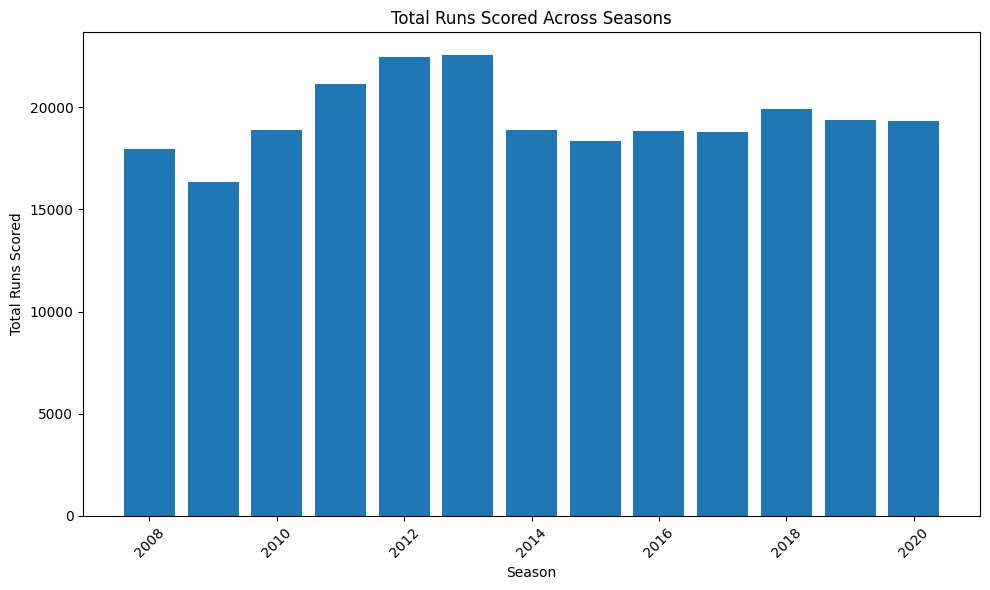

In [13]:
# Total number of runs scored across seasons :

combined_df = pd.merge(delivers, matches, on='id', how='left')

total_runs_across_seasons = combined_df.groupby('season')['total_runs'].sum()

total_runs_across_seasons_df = total_runs_across_seasons.reset_index()
total_runs_across_seasons_df.columns = ['Season', 'Total Runs']
print(total_runs_across_seasons_df)

plt.figure(figsize=(10, 6))
plt.bar(total_runs_across_seasons_df['Season'], total_runs_across_seasons_df['Total Runs'])
plt.xlabel('Season')
plt.ylabel('Total Runs Scored')
plt.title('Total Runs Scored Across Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [14]:
#Runs scored per match across seasons :
# Calculate runs scored *per match*
runs_per_match = combined_df.groupby(['season', 'id'])['total_runs'].sum().reset_index()


print(runs_per_match)

     season       id  total_runs
0      2008   335982         304
1      2008   335983         447
2      2008   335984         261
3      2008   335985         331
4      2008   335986         222
..      ...      ...         ...
811    2020  1216547         402
812    2020  1237177         343
813    2020  1237178         263
814    2020  1237180         361
815    2020  1237181         313

[816 rows x 3 columns]


In [15]:
##  Count of matches by umpires :

# Concatenate the umpire1 and umpire2 columns to create a single column of umpires
umpires = pd.concat([matches['umpire1'], matches['umpire2']])

# Count the occurrences of each umpire
umpire_counts = umpires.value_counts().reset_index()

# Rename the columns
umpire_counts.columns = ['Umpire', 'Match Count']

# Display the result
print(umpire_counts)

                   Umpire  Match Count
0                  S Ravi          121
1         HDPK Dharmasena           94
2            AK Chaudhary           87
3           C Shamshuddin           82
4               M Erasmus           65
5               CK Nandan           57
6             Nitin Menon           57
7              SJA Taufel           55
8               Asad Rauf           51
9             VA Kulkarni           50
10           BNJ Oxenford           48
11            CB Gaffaney           47
12              RJ Tucker           46
13            BR Doctrove           42
14            RE Koertzen           41
15              Aleem Dar           38
16              BF Bowden           37
17               NJ Llong           37
18  KN Ananthapadmanabhan           33
19         RK Illingworth           31
20            SK Tarapore           31
21              RB Tiffin           30
22               S Asnani           30
23            AY Dandekar           28
24              DJ Harper

                           Team  Toss Wins
0                Mumbai Indians        106
1         Kolkata Knight Riders         98
2           Chennai Super Kings         97
3   Royal Challengers Bangalore         87
4              Rajasthan Royals         87
5               Kings XI Punjab         85
6              Delhi Daredevils         80
7           Sunrisers Hyderabad         57
8               Deccan Chargers         43
9                 Pune Warriors         20
10               Delhi Capitals         20
11                Gujarat Lions         15
12         Kochi Tuskers Kerala          8
13      Rising Pune Supergiants          7
14       Rising Pune Supergiant          6


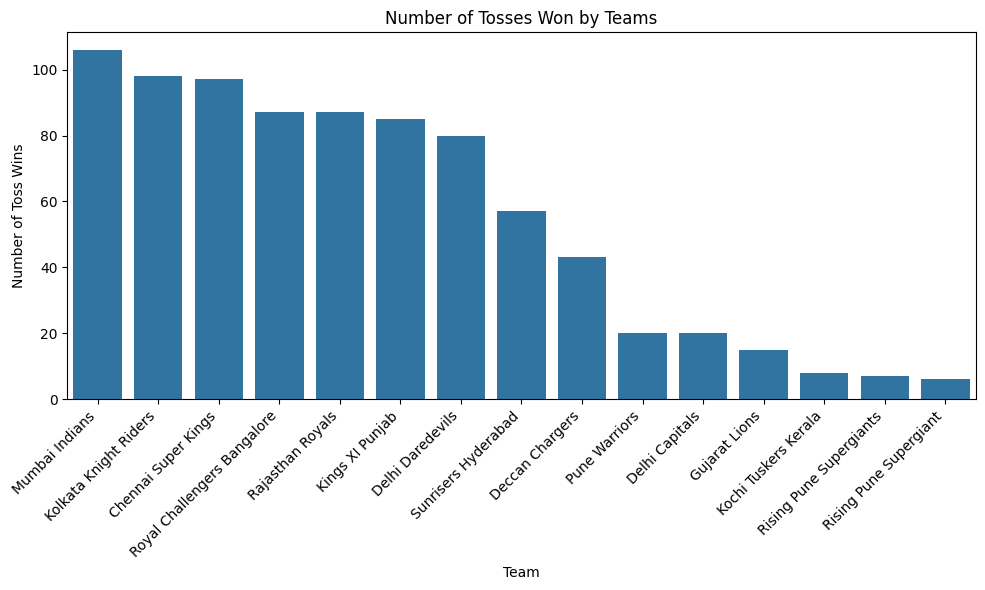

In [16]:
# Number of tosses won by teams :
# Count the number of tosses won by each team
toss_wins = matches['toss_winner'].value_counts().reset_index()
toss_wins.columns=['Team','Toss Wins']

print(toss_wins)


# Seaborn histplot (countplot)
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', data=matches, order=toss_wins['Team']) 
plt.xlabel('Team')
plt.ylabel('Number of Toss Wins')
plt.title('Number of Tosses Won by Teams')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


In [17]:
#Decision made after winning the toss :

# Count the occurrences of each toss decision
toss_decisions = matches['toss_decision'].value_counts()

# Calculate percentages
toss_percentages = (toss_decisions / toss_decisions.sum()) * 100

# Create a DataFrame with counts and percentages
toss_df = pd.DataFrame({'Toss Decision': toss_decisions.index, 
                          'Count': toss_decisions.values,
                          'Percentage': toss_percentages.values})

# Display the results
print(toss_df)

  Toss Decision  Count  Percentage
0         field    496   60.784314
1           bat    320   39.215686


toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50
2020            27     33


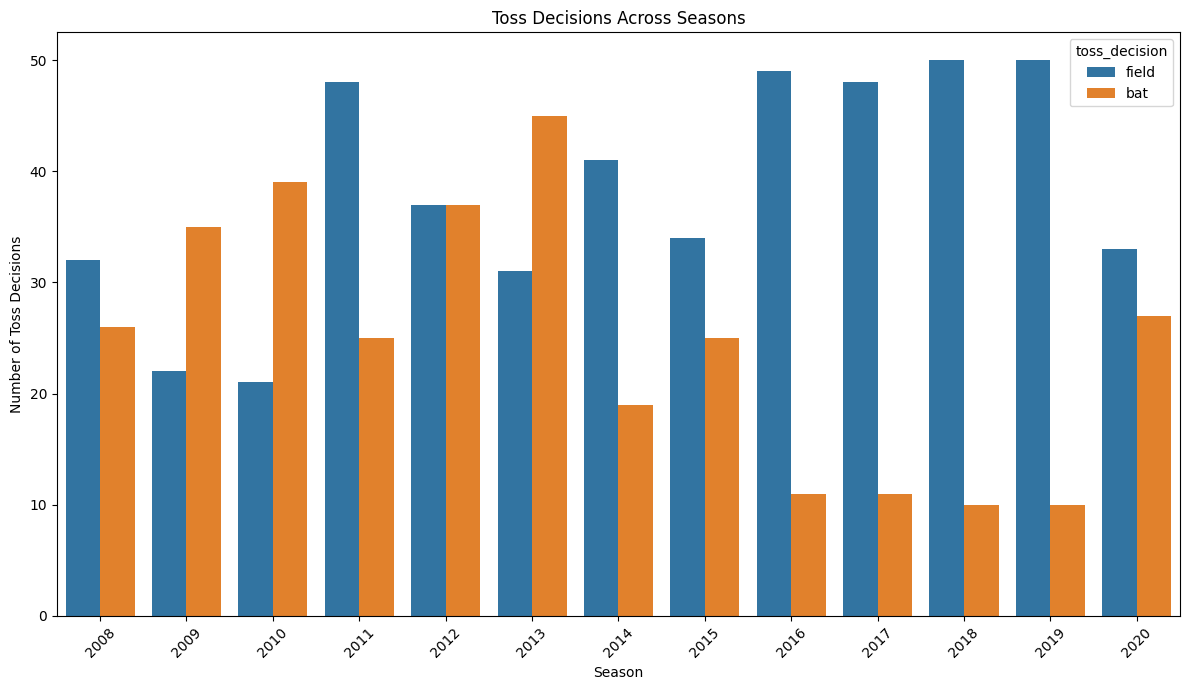

In [22]:
# Toss decision across seasons :

toss_decisions_per_season = matches.groupby(['season', 'toss_decision']).size().unstack(fill_value=0)
print(toss_decisions_per_season)


plt.figure(figsize=(12, 7))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xlabel('Season')
plt.ylabel('Number of Toss Decisions')
plt.title('Toss Decisions Across Seasons')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


toss_won_match
True     51.22549
False    48.77451
Name: proportion, dtype: float64


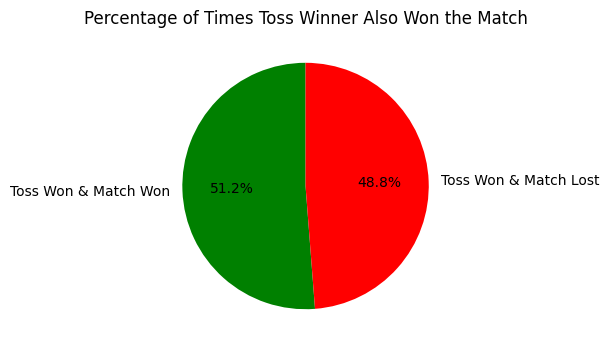

In [28]:
# Winning toss implies winning game ?
matches['toss_won_match'] = (matches['toss_winner']==matches['winner'])
toss_win_match_percentage = matches['toss_won_match'].value_counts(normalize=True) * 100
print(toss_win_match_percentage)


plt.figure(figsize=(8, 4))
plt.pie(toss_win_match_percentage, labels=toss_win_match_percentage.index.map({True: 'Toss Won & Match Won', False: 'Toss Won & Match Lost'}),
        autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Percentage of Times Toss Winner Also Won the Match')
plt.show()

Mumbai Indians                 203
Royal Challengers Bangalore    195
Kolkata Knight Riders          192
Kings XI Punjab                190
Chennai Super Kings            178
Delhi Daredevils               161
Rajasthan Royals               161
Sunrisers Hyderabad            124
Deccan Chargers                 75
Pune Warriors                   46
Delhi Capitals                  33
Gujarat Lions                   30
Rising Pune Supergiant          16
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64


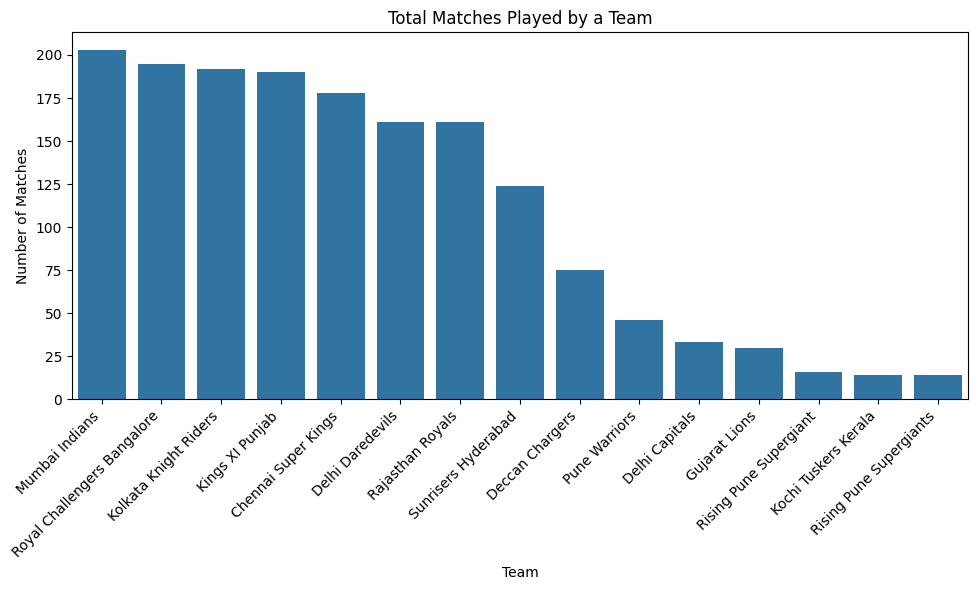

In [36]:
# Total number of matches played by a team :
team_matches = pd.concat([matches['team1'],matches['team2']]).value_counts()
print(team_matches)

plt.figure(figsize=(10, 6))
sns.countplot(x=pd.concat([matches['team1'], matches['team2']]), order=team_matches.index)  
plt.title('Total Matches Played by a Team')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
#  Comparision between two teams :

def compare_teams(team1='Chennai Super Kings', team2='Mumbai Indians'):
    team_matches = matches[((matches['team1'] == team1) | (matches['team2'] == team1)) & ((matches['team1'] == team2) | (matches['team2'] == team2))]

    if team_matches.empty:
        print(f"No matches found between {team1} and {team2}")
        return

    wins_team1 = team_matches[team_matches['winner'] == team1].shape[0]
    wins_team2 = team_matches[team_matches['winner'] == team2].shape[0]
    total_matches = team_matches.shape[0]

    print(f"\nHead-to-head record between {team1} and {team2}:")
    print(f"Total Matches Played: {total_matches}")
    print(f"{team1} Wins: {wins_team1} ({wins_team1 / total_matches * 100:.2f}%)")
    print(f"{team2} Wins: {wins_team2} ({wins_team2 / total_matches * 100:.2f}%)")

    # Matches per season
    matches_per_season = team_matches.groupby('season')['id'].count()
    print(f"\nMatches per season between {team1} and {team2}:\n{matches_per_season}")

    # Wins per season
    wins_per_season_team1 = team_matches[team_matches['winner'] == team1].groupby('season')['id'].count().reindex(matches_per_season.index, fill_value=0)
    wins_per_season_team2 = team_matches[team_matches['winner'] == team2].groupby('season')['id'].count().reindex(matches_per_season.index, fill_value=0)
    print(f"\nWins per season for {team1}:\n{wins_per_season_team1}")
    print(f"\nWins per season for {team2}:\n{wins_per_season_team2}")


compare_teams()  


Head-to-head record between Chennai Super Kings and Mumbai Indians:
Total Matches Played: 30
Chennai Super Kings Wins: 12 (40.00%)
Mumbai Indians Wins: 18 (60.00%)

Matches per season between Chennai Super Kings and Mumbai Indians:
season
2008    2
2009    2
2010    3
2011    1
2012    3
2013    4
2014    3
2015    4
2018    2
2019    4
2020    2
Name: id, dtype: int64

Wins per season for Chennai Super Kings:
season
2008    1
2009    1
2010    2
2011    0
2012    1
2013    1
2014    3
2015    1
2018    1
2019    0
2020    1
Name: id, dtype: int64

Wins per season for Mumbai Indians:
season
2008    1
2009    1
2010    1
2011    1
2012    2
2013    3
2014    0
2015    3
2018    1
2019    4
2020    1
Name: id, dtype: int64


In [48]:
#  Scored 200+ runs :
deliveries_with_season = pd.merge(delivers, matches[['id', 'season']], left_on='id', right_on='id', how='left')

# Calculate total runs per match per team
runs_per_match = deliveries_with_season.groupby(['id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()
runs_per_match = runs_per_match.rename(columns={'total_runs': 'runs'})

# Count 200+ scores for all teams at once
two_hundred_plus_scores_all_teams = runs_per_match[runs_per_match['runs'] >= 200].groupby('batting_team')['id'].count().reset_index()
two_hundred_plus_scores_all_teams.columns = ['Team', '200+ Scores']

# Sort the results (descending order)
two_hundred_plus_scores_all_teams = two_hundred_plus_scores_all_teams.sort_values(by='200+ Scores', ascending=False)

print(two_hundred_plus_scores_all_teams)

                           Team  200+ Scores
9   Royal Challengers Bangalore           19
0           Chennai Super Kings           17
5               Kings XI Punjab           14
7                Mumbai Indians           14
6         Kolkata Knight Riders           12
10          Sunrisers Hyderabad           12
8              Rajasthan Royals            9
3              Delhi Daredevils            5
2                Delhi Capitals            2
1               Deccan Chargers            1
4                 Gujarat Lions            1


In [46]:
deliveries_with_season = pd.merge(delivers, matches[['id', 'season']], left_on='id', right_on='id', how='left')

# Calculate total runs conceded per match per team
runs_conceded_per_match = deliveries_with_season.groupby(['id', 'inning', 'bowling_team'])['total_runs'].sum().reset_index()
runs_conceded_per_match = runs_conceded_per_match.rename(columns={'total_runs': 'runs_conceded'})

# Count 200+ runs conceded for all teams at once
two_hundred_plus_conceded_all_teams = runs_conceded_per_match[runs_conceded_per_match['runs_conceded'] >= 200].groupby('bowling_team')['id'].count().reset_index()
two_hundred_plus_conceded_all_teams.columns = ['Team', '200+ Runs Conceded']

# Sort the results in descending order
two_hundred_plus_conceded_all_teams = two_hundred_plus_conceded_all_teams.sort_values(by='200+ Runs Conceded', ascending=False)

print(two_hundred_plus_conceded_all_teams)


                           Team  200+ Runs Conceded
5               Kings XI Punjab                  20
11  Royal Challengers Bangalore                  17
0           Chennai Super Kings                  12
3              Delhi Daredevils                  11
6         Kolkata Knight Riders                  10
9              Rajasthan Royals                  10
7                Mumbai Indians                   8
12          Sunrisers Hyderabad                   7
2                Delhi Capitals                   3
4                 Gujarat Lions                   3
1               Deccan Chargers                   2
8                 Pune Warriors                   1
10       Rising Pune Supergiant                   1


In [52]:
# Highest runs in an innings :

deliveries_with_match_info = pd.merge(delivers, matches, on='id', how='left')

# Calculate total runs scored in each innings
runs_per_innings = deliveries_with_match_info.groupby(['id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

# Find the highest score in an innings
highest_runs_innings = runs_per_innings.sort_values(by='total_runs', ascending=False).iloc[0]

print("Highest Runs in an Innings:")
print(highest_runs_innings)





Highest Runs in an Innings:
id                                   598027
inning                                    1
batting_team    Royal Challengers Bangalore
total_runs                              263
Name: 701, dtype: object


In [57]:
# Find the biggest win in terms of run margin
biggest_win_runs = matches.sort_values(by='result_margin', ascending=False).iloc[0]


winning_team = biggest_win_runs['winner']

teams = [biggest_win_runs['team1'], biggest_win_runs['team2']]
losing_team = [team for team in teams if team != winning_team][0]
margin = biggest_win_runs['result_margin']

print(f"Biggest Win (by Runs):")
print(f"Winning Team: {winning_team}")
print(f"Losing Team: {losing_team}")
print(f"Margin: {margin} runs")


Biggest Win (by Runs):
Winning Team: Mumbai Indians
Losing Team: Delhi Daredevils
Margin: 146.0 runs


In [64]:
# Find the batsman who faced the most balls
balls_faced = delivers.groupby('batsman')['ball'].count()
most_balls_played = balls_faced.sort_values(ascending=False).iloc[0]
most_balls_played_batsman = balls_faced.sort_values(ascending=False).index[0] 

# To display the top N batsmen who faced the most balls:
n = 5  # Number of top batsmen to display
top_n_ball_faced = balls_faced.sort_values(ascending=False).head(n)
print(f"\nTop {n} Batsmen who faced the most balls:")
print(top_n_ball_faced)


Top 5 Batsmen who faced the most balls:
batsman
V Kohli      4609
S Dhawan     4208
RG Sharma    4088
SK Raina     4041
DA Warner    3819
Name: ball, dtype: int64


Top 10 Run Scorers of All Time:
batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
Name: batsman_runs, dtype: int64


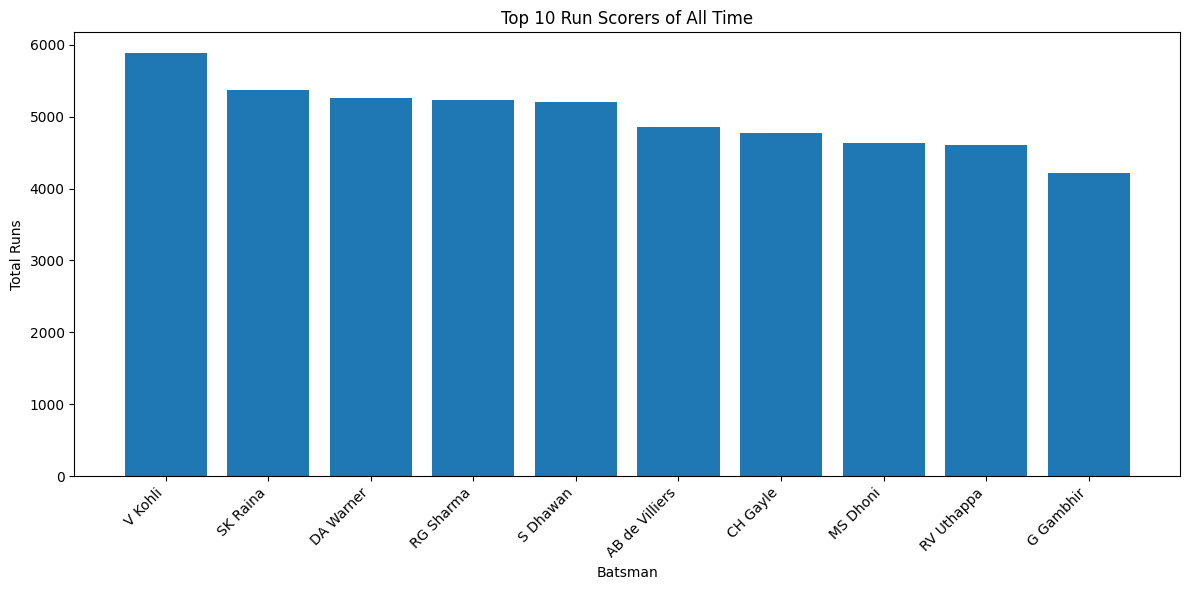

In [68]:
# Top 10 run scorer of all time :
# Calculate runs scored by each batsman
runs_scored = delivers.groupby('batsman')['batsman_runs'].sum()

# Get the top 10 run-scorers
top_10_scorers = runs_scored.sort_values(ascending=False).head(10)

print("Top 10 Run Scorers of All Time:")
print(top_10_scorers)


plt.figure(figsize=(12, 6))  
plt.bar(top_10_scorers.index, top_10_scorers.values)
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.title("Top 10 Run Scorers of All Time")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [69]:
#  Most number of 4's :
fours_hit = delivers[delivers['batsman_runs'] == 4].groupby('batsman')['batsman_runs'].count()
most_fours_hit = fours_hit.sort_values(ascending=False)

# Display the top N four hitters
n = 10 
top_n_four_hitters = most_fours_hit.head(n)

print(f"Top {n} Four Hitters:")
print(top_n_four_hitters)

Top 10 Four Hitters:
batsman
S Dhawan          591
DA Warner         510
V Kohli           504
SK Raina          493
G Gambhir         492
RG Sharma         458
RV Uthappa        454
AM Rahane         416
AB de Villiers    390
CH Gayle          384
Name: batsman_runs, dtype: int64


In [70]:
#  Most number of 6's :

sixes_hit = delivers[delivers['batsman_runs'] == 6].groupby('batsman')['batsman_runs'].count()
most_sixes_hit = sixes_hit.sort_values(ascending=False)

# Display the top N six hitters
n = 10  
top_n_six_hitters = most_sixes_hit.head(n)

print(f"Top {n} Six Hitters:")
print(top_n_six_hitters)



Top 10 Six Hitters:
batsman
CH Gayle          349
AB de Villiers    235
MS Dhoni          216
RG Sharma         214
V Kohli           202
KA Pollard        198
DA Warner         195
SK Raina          194
SR Watson         190
RV Uthappa        163
Name: batsman_runs, dtype: int64


In [71]:
# Highest Strike rate (minimum 100 balls):

batsman_stats = delivers.groupby('batsman').agg({'ball': 'count', 'batsman_runs': 'sum'})
batsman_stats = batsman_stats.rename(columns={'ball': 'balls_faced', 'batsman_runs': 'total_runs'})

batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Filter for batsmen who have faced at least 100 balls
batsman_stats_100_plus = batsman_stats[batsman_stats['balls_faced'] >= 100]

# Get the batsmen with the highest strike rate
highest_strike_rate = batsman_stats_100_plus.sort_values(by='strike_rate', ascending=False)

# Display the top N batsmen with the highest strike rate
n = 10  
top_n_strike_rate = highest_strike_rate.head(n)

print(f"Top {n} Batsmen with Highest Strike Rate (Minimum 100 Balls):")
print(top_n_strike_rate)

Top 10 Batsmen with Highest Strike Rate (Minimum 100 Balls):
               balls_faced  total_runs  strike_rate
batsman                                            
AD Russell             882        1517   171.995465
K Gowtham              113         186   164.601770
BCJ Cutting            146         238   163.013699
N Pooran               323         521   161.300310
SP Narine              573         892   155.671902
MM Ali                 199         309   155.276382
CH Morris              360         551   153.055556
JC Archer              128         195   152.343750
CR Brathwaite          120         181   150.833333
Bipul Sharma           124         187   150.806452


In [72]:
#Highest wicket-taker :
wickets_taken = delivers[delivers['is_wicket'] == 1].groupby('bowler')['is_wicket'].count()

# Get the bowlers with the most wickets
most_wickets = wickets_taken.sort_values(ascending=False)

# Display the top N wicket-takers
n = 10  
top_n_wicket_takers = most_wickets.head(n)

print(f"Top {n} Wicket-Takers:")
print(top_n_wicket_takers)


Top 10 Wicket-Takers:
bowler
SL Malinga         188
DJ Bravo           175
A Mishra           169
PP Chawla          164
Harbhajan Singh    161
R Ashwin           153
B Kumar            146
SP Narine          143
UT Yadav           137
R Vinay Kumar      127
Name: is_wicket, dtype: int64


In [73]:
# Man of the Match award :
mom_awards = matches['player_of_match'].value_counts()

# Display the top N players with the most MOM awards
n = 10  
top_n_mom = mom_awards.head(n)

print(f"Top {n} Man of the Match Award Winners:")
print(top_n_mom)



Top 10 Man of the Match Award Winners:
player_of_match
AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: count, dtype: int64


In [74]:
# Total number of fours in each season :

deliveries_with_season = pd.merge(delivers, matches[['id', 'season']], on='id', how='left')

# Calculate total fours hit in each season
fours_per_season = deliveries_with_season[deliveries_with_season['batsman_runs'] == 4].groupby('season')['batsman_runs'].count()

print("Total Fours in Each Season:")
print(fours_per_season)


Total Fours in Each Season:
season
2008    1703
2009    1317
2010    1708
2011    1916
2012    1911
2013    2052
2014    1562
2015    1607
2016    1633
2017    1611
2018    1652
2019    1653
2020    1583
Name: batsman_runs, dtype: int64


In [76]:
# Total number of sixes in each season :
deliveries_with_season = pd.merge(delivers, matches[['id', 'season']], on='id', how='left')

# Calculate total sixes hit in each season
sixes_per_season = deliveries_with_season[deliveries_with_season['batsman_runs'] == 6].groupby('season')['batsman_runs'].count()

print("Total Sixes in Each Season:")
print(sixes_per_season)


Total Sixes in Each Season:
season
2008    623
2009    506
2010    585
2011    639
2012    733
2013    675
2014    714
2015    692
2016    639
2017    705
2018    872
2019    784
2020    735
Name: batsman_runs, dtype: int64


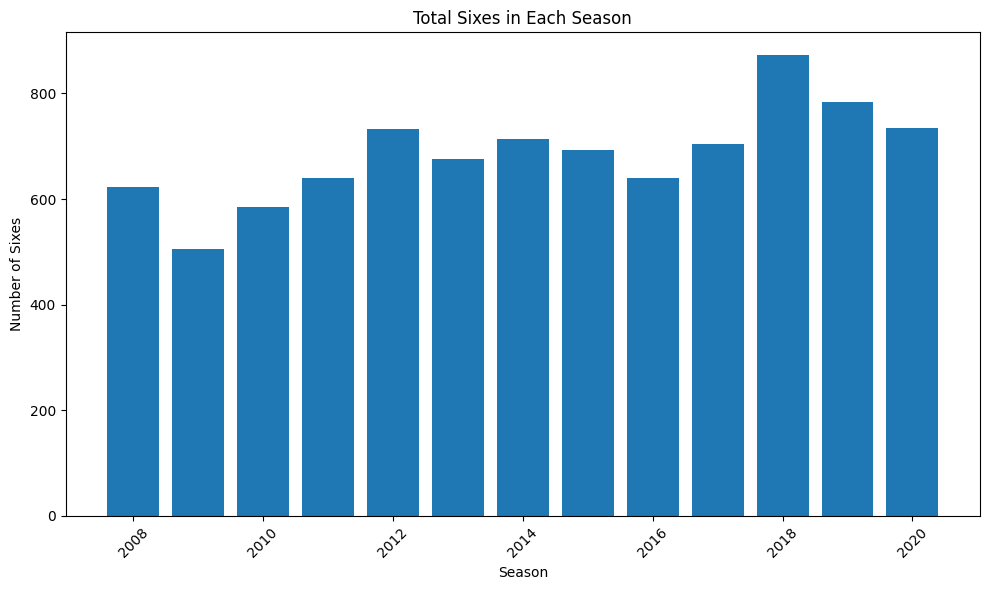

In [77]:
plt.figure(figsize=(10, 6))
plt.bar(sixes_per_season.index, sixes_per_season.values)
plt.xlabel("Season")
plt.ylabel("Number of Sixes")
plt.title("Total Sixes in Each Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()